<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
#! pip install plotly

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [3]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [4]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [6]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [7]:
# Filter Data to Most Recent Year
df['year'].value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [8]:
df =df[df['year']==2007]
df['year'].value_counts()

2007    142
Name: year, dtype: int64

In [9]:
# Set Country to Index
df.set_index('country', inplace=True)

In [10]:
df.columns

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha',
       'iso_num'],
      dtype='object')

In [11]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns= ['iso_alpha','year','iso_num'], axis = 1, inplace= True)

In [12]:
# How many countries in each continent?
df.continent.value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [13]:
# Get dummies!

df = pd.get_dummies(data=df, columns=['continent'], drop_first= True)

In [14]:
# Head (again!)

df.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,1,0
Algeria,72.30100,33333216,6223.36747,0,0,0,0
Angola,42.73100,12420476,4797.23127,0,0,0,0
Argentina,75.32000,40301927,12779.37964,1,0,0,0


In [15]:
df.columns

Index(['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania'],
      dtype='object')

In [16]:
# Define X

X = df[['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania']]

In [17]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### II. K-Means Clustering Model

In [18]:
# Elbow Plot
import warnings
warnings.filterwarnings('ignore')

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[993.9999999999999,
 745.3298363925305,
 574.4502741562052,
 411.73669924060437,
 265.0727010035231,
 145.1814036102372,
 107.71312813400928,
 85.04751469619286,
 64.21503964722274,
 51.11763019162191,
 44.42739344931133,
 39.61391638043154,
 34.9732936272792,
 32.188930325040225,
 29.393976406797385,
 27.60106783104939,
 24.86535523001006,
 22.9423678018152,
 20.67935810943256,
 18.79931213638287]

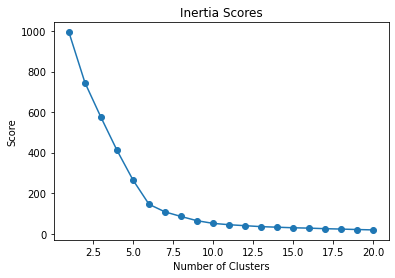

In [19]:
plt.plot(range(1,21), inertia_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Inertia Scores");

In [20]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

[0.37364650802336946,
 0.4487356234240466,
 0.5626593043305045,
 0.6010799129127454,
 0.6350842772929556,
 0.639081463196919,
 0.593693718907387,
 0.5983706823621519,
 0.6055705819165501,
 0.570938799570904,
 0.532980577767962,
 0.5348277074522618,
 0.4736381214379417,
 0.5396841376422912,
 0.4649067649969708,
 0.4787488409441888,
 0.4928460815925534,
 0.49608299148362506,
 0.4717557647961839]

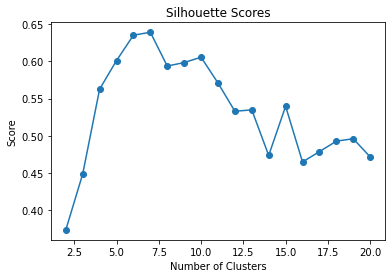

In [21]:
plt.plot(range(2,21),silhouette_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Silhouette Scores");

#### Based off of our metrics above, which k should we try first?

Answer Here:
At k = 6 or 7, the silhouette scores are at their peak (high silhouette score means the clusters are well separated). Moreover, the inertia scores dropped sharply, and started to be stable after this. 

In [22]:
# Now let's try it!

# Instantiate & Fit
km = KMeans(n_clusters=6, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [23]:
# Silhouette Score
silhouette_score(X_scaled, kmeans.labels_)

0.4717557647961839

#### Visualize Your Clusters!

In [24]:
# Add cluster column

df['cluster'] = km.labels_
df.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0,3
Albania,76.42300,3600523,5937.02953,0,0,1,0,1
Algeria,72.30100,33333216,6223.36747,0,0,0,0,4
Angola,42.73100,12420476,4797.23127,0,0,0,0,4
Argentina,75.32000,40301927,12779.37964,1,0,0,0,0


In [25]:
df['cluster'].value_counts()

4    52
3    31
1    30
0    25
5     2
2     2
Name: cluster, dtype: int64

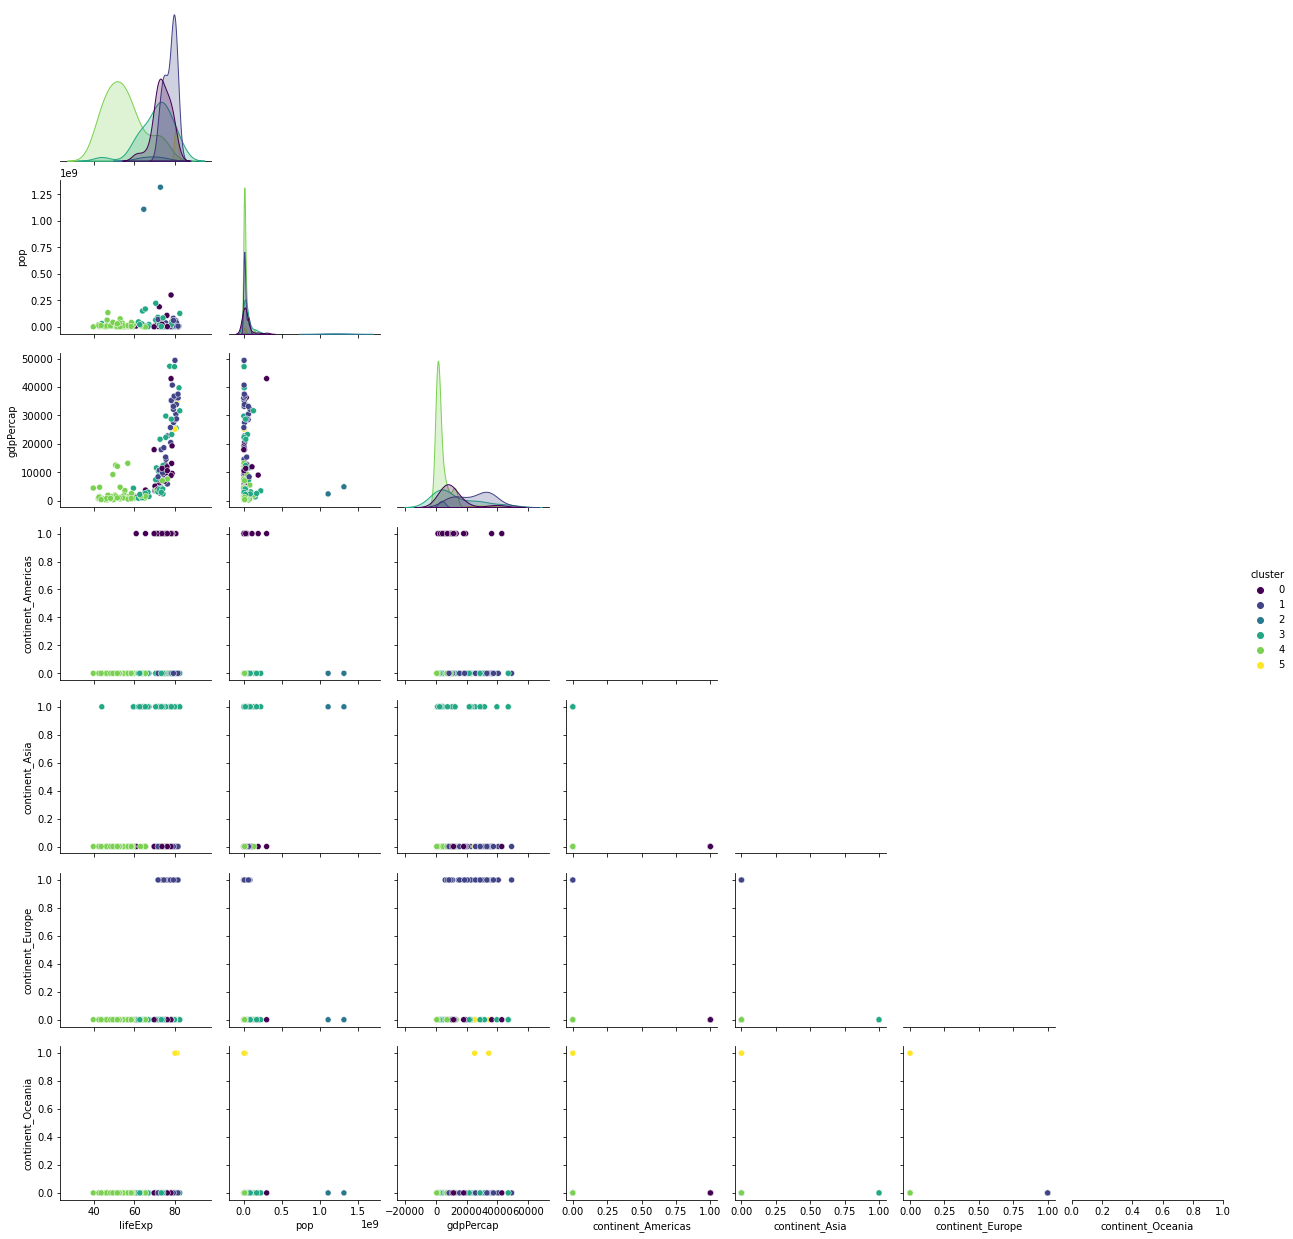

In [39]:
# Method 1: Pairplots/Scatterplots
sns.pairplot(data=df, hue='cluster', corner= True, palette='viridis')

<AxesSubplot:xlabel='cluster'>

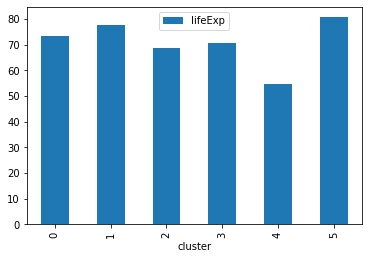

In [27]:
# Method 2: Groupby
df.groupby('cluster')['lifeExp'].mean().plot(kind='bar',legend=True)


<AxesSubplot:xlabel='cluster'>

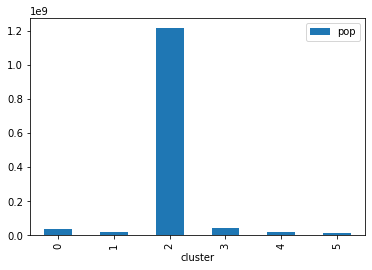

In [28]:
df.groupby('cluster')['pop'].mean().plot(kind='bar',legend=True)

<AxesSubplot:xlabel='cluster'>

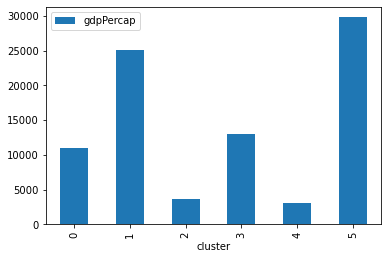

In [29]:
df.groupby('cluster')['gdpPercap'].mean().plot(kind='bar',legend=True)

#### An Even Closer Look...Which countries are in each of these clusters?

In [38]:
# For loop
for k in range(0,6):
    print(f'list of countries in group {k}')
    df_k = df[df['cluster'] == k]
    index_list = df_k.index.values.tolist()
    print(index_list)
    print('================================\n')

list of countries in group 0
['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']

list of countries in group 1
['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

list of countries in group 2
['China', 'India']

list of countries in group 3
['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'L

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [60]:
# Define X

X = df[['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania']]

In [61]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [62]:
### Find "optimal" epsilon of DBSCAN

epsilon_list = [0.1, 0.5, 1.0, 2.0, 2.3, 2.5, 2.6, 2.7, 2.8,]
score_list = []

for epi in epsilon_list:
    dbscan = DBSCAN(eps=epi, min_samples=2)
    dbscan.fit(X_scaled)
    score_list.append(silhouette_score(X_scaled, dbscan.labels_))

score_list

[-0.2616965234865553,
 0.4037518055318919,
 0.6205999229115197,
 0.6350842772929556,
 0.6350842772929556,
 0.35780521873057713,
 0.35780521873057713,
 0.6624341676108216,
 0.6624341676108216]

In [63]:
results = pd.DataFrame(data=score_list, 
                       columns=['Silhouette Score'],
                       index = epsilon_list)
results

,Silhouette Score
0.10000,-0.26170
0.50000,0.40375
1.00000,0.62060
2.00000,0.63508
2.30000,0.63508
2.50000,0.35781
2.60000,0.35781
2.70000,0.66243
2.80000,0.66243


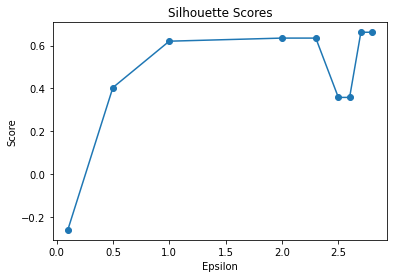

In [64]:
plt.plot(epsilon_list, score_list, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Score")
plt.title("Silhouette Scores");

In [65]:
#Choose epsi = 2.0 
dbscan = DBSCAN(eps=2.0, min_samples=2)
dbscan.fit(X_scaled)

DBSCAN(eps=2.0, min_samples=2)

In [66]:
pd.Series(dbscan.labels_).value_counts()
#there are 6 clusters

2    52
0    31
1    30
3    25
4     2
5     2
dtype: int64

In [67]:
#evaluate model
silhouette_score(X_scaled, dbscan.labels_)

# Silhoutte Score - range of -1 to 1 and higher is better

0.6350842772929556

With the same k, the best silhouette score of DBSCAN model is better than K-means model.
However,  group 0 from DBSCAN model has more members then from  K-means model

In [68]:
# Create cluster column
df['cluster'] = dbscan.labels_

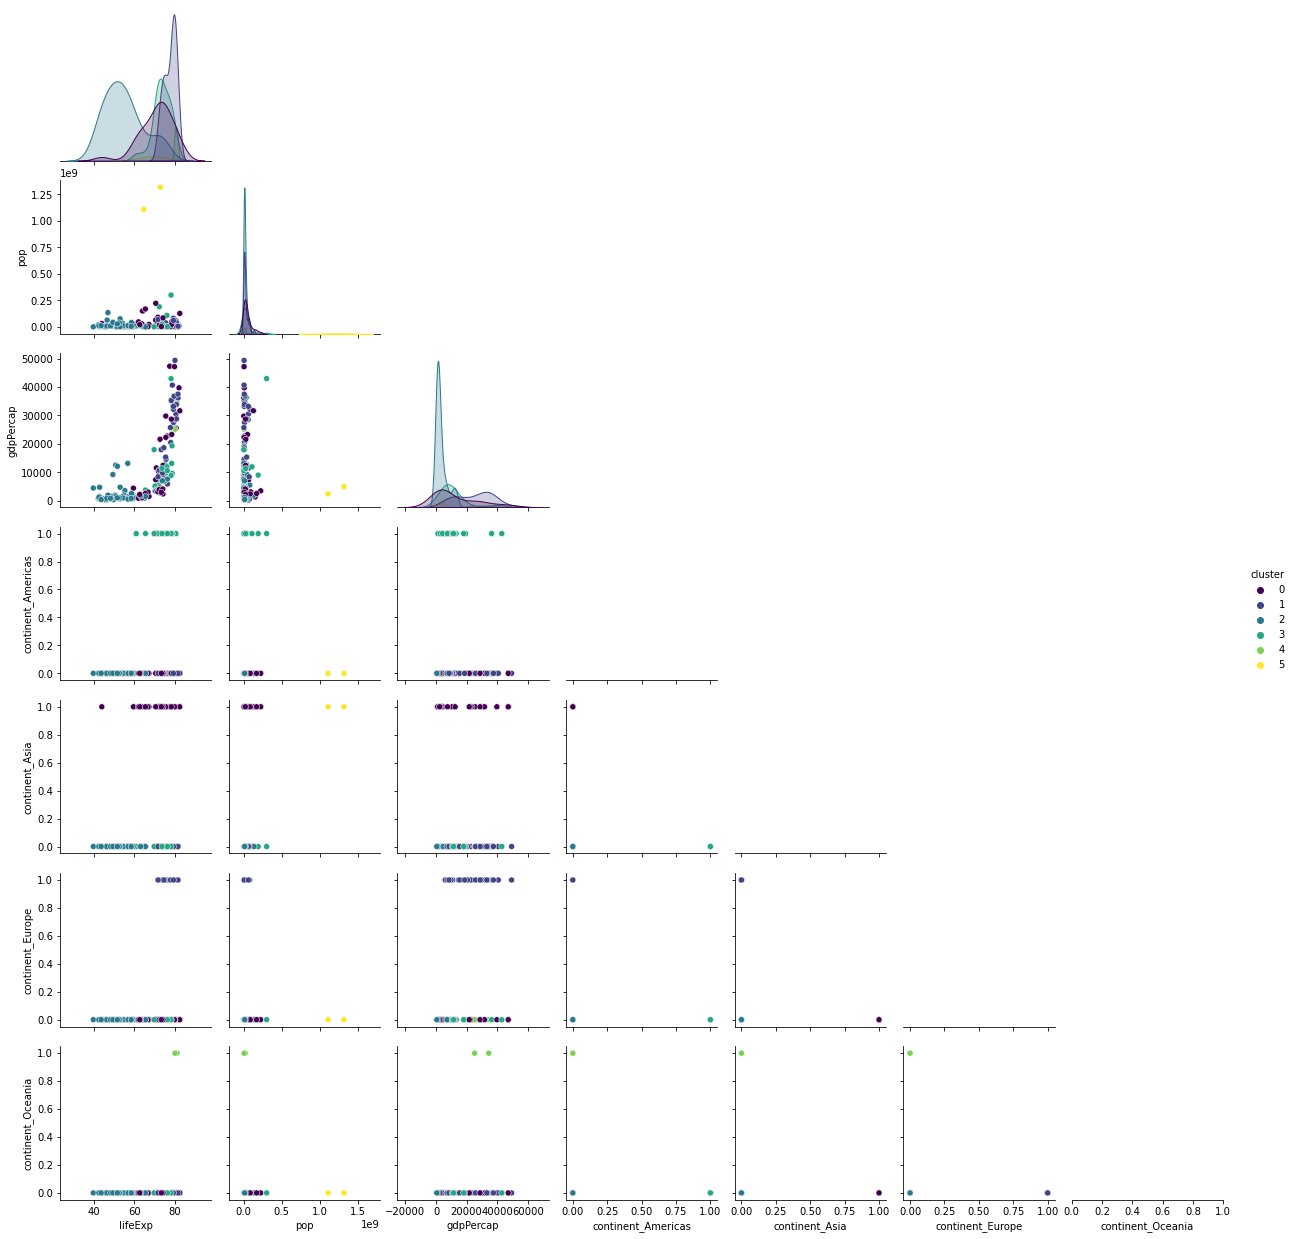

In [70]:
#Visialization
sns.pairplot(data=df, hue='cluster', corner= True, palette='viridis')

In [69]:
# For loop
for k in range(0,6):
    print(f'list of countries in group {k}')
    df_k = df[df['cluster'] == k]
    index_list = df_k.index.values.tolist()
    print(index_list)
    print('================================\n')

list of countries in group 0
['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.']

list of countries in group 1
['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

list of countries in group 2
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Con

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 